# SonarQube TS Analysis

In [1]:
import pandas as pd
import numpy as np
import json
import requests
import datetime, dateutil.parser
from pandas import Series, DataFrame, Panel
from pprint import pprint
#pd.set_printoptions(max_rows=15) # this limit maximum numbers of rows

"switch on" inline graphic for the notebook:

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
metrics = 'accessors,new_technical_debt,blocker_violations,conditions_to_cover,new_it_conditions_to_cover,new_conditions_to_cover,bugs,burned_budget,business_value,class_complexity_distribution,classes,code_smells,comment_lines,commented_out_code_lines,comment_lines_density,comment_lines_data,complexity,class_complexity,file_complexity,function_complexity,complexity_in_classes,complexity_in_functions,branch_coverage,new_it_branch_coverage,new_branch_coverage,conditions_by_line,confirmed_issues,coverage,new_it_coverage,coverage_line_hits_data,new_coverage,covered_conditions_by_line,critical_violations,last_commit_date,directories,duplicated_blocks,new_duplicated_blocks,duplicated_files,duplicated_lines,duplicated_lines_density,new_duplicated_lines,new_duplicated_lines_density,duplications_data,effort_to_reach_maintainability_rating_a,executable_lines_data,false_positive_issues,file_complexity_distribution,files,function_complexity_distribution,functions,generated_lines,generated_ncloc,info_violations,violations,it_conditions_to_cover,it_branch_coverage,it_conditions_by_line,it_coverage,it_coverage_line_hits_data,it_covered_conditions_by_line,it_line_coverage,it_lines_to_cover,it_uncovered_conditions,it_uncovered_lines,line_coverage,new_it_line_coverage,new_line_coverage,lines,ncloc,ncloc_language_distribution,new_lines,lines_to_cover,new_it_lines_to_cover,new_lines_to_cover,sqale_rating,new_maintainability_rating,major_violations,minor_violations,ncloc_data,new_blocker_violations,new_bugs,new_code_smells,new_critical_violations,new_info_violations,new_violations,new_major_violations,new_minor_violations,new_vulnerabilities,open_issues,overall_conditions_to_cover,new_overall_conditions_to_cover,overall_branch_coverage,new_overall_branch_coverage,overall_conditions_by_line,overall_coverage,overall_coverage_line_hits_data,new_overall_coverage,overall_covered_conditions_by_line,overall_line_coverage,new_overall_line_coverage'

In [4]:
metricsList = metrics.split(',')

In [5]:
response = requests.get('http://195.251.210.166:9000/api/timemachine?resource=eclipse:nebula&metrics='+metrics)

In [6]:
json_data = json.loads(response.text)

In [7]:
cells = json_data[0]['cells']#cells - metric values
cols = json_data[0]['cols']#cols - Metrcs

In [8]:
dates = []
versionMetrics = []

In [9]:
for item in cells:
    d = item.get('d')
    date = dateutil.parser.parse(d)
    dates.append(date.strftime('%m/%d/%Y'))

In [10]:
df = pd.DataFrame(columns=metricsList)
for item in cells:
    v = item.get('v')
    df = df.append(pd.Series(v, index=metricsList), ignore_index=True)

In [11]:
#NTD=df['new_technical_debt']
#NTD.plot()

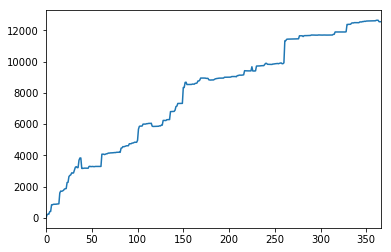

In [12]:
OI=df['open_issues']
OI.plot()

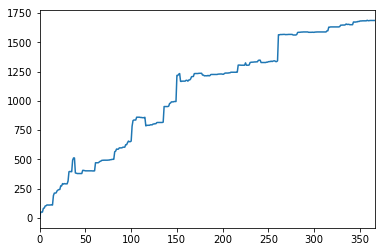

In [13]:
BUGS=df['bugs']
BUGS.plot()

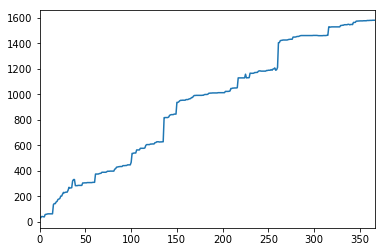

In [14]:
CLASSES=df['classes']
CLASSES.plot()

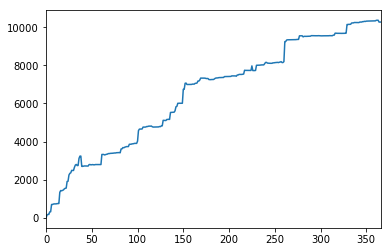

In [15]:
CS=df['code_smells']
CS.plot()

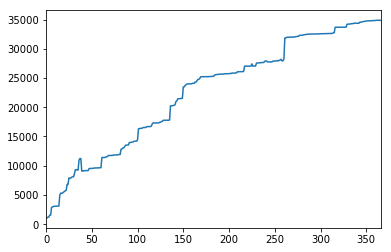

In [16]:
COMPLEXITY=df['complexity']
COMPLEXITY.plot()

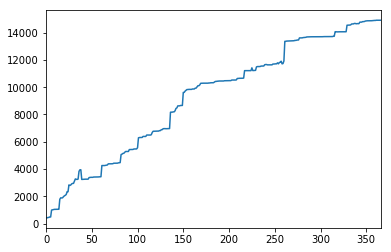

In [17]:
FUNCTIONS=df['functions']
FUNCTIONS.plot()

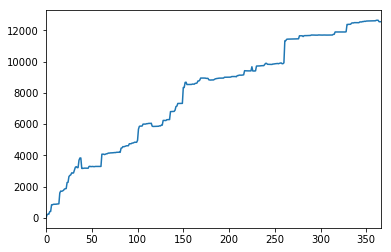

In [18]:
VIOLATIONS=df['violations']
VIOLATIONS.plot()

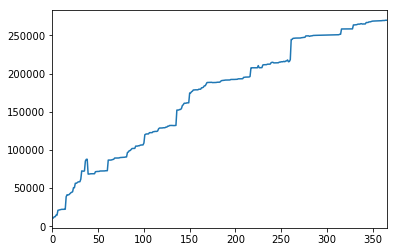

In [19]:
L=df['lines']
L.plot()

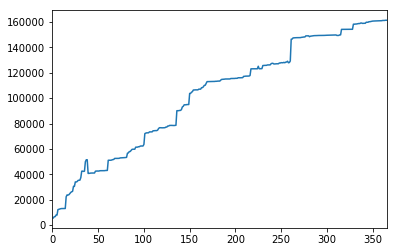

In [20]:
NCLOC=df['ncloc']
NCLOC.plot()

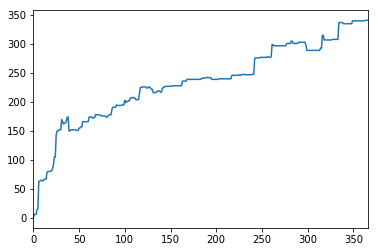

In [21]:
IV=df['info_violations']
IV.plot()

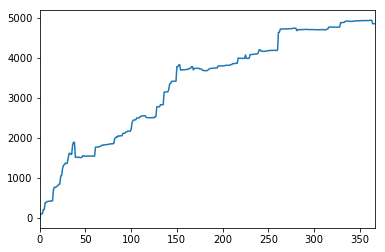

In [22]:
MJV=df['major_violations']
MJV.plot()

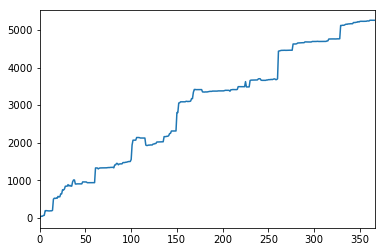

In [23]:
MNV=df['minor_violations']
MNV.plot()

In [24]:
#=df['']
#.plot()

In [25]:
#=df['']
#.plot()